# HomeWork 4

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Intro-to-ML


In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.datasets import load_breast_cancer

#DATASET

In [112]:
def loadCancerData():
    cancerData = load_breast_cancer()
    x = cancerData.data
    y = cancerData.target
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    xTrainStd = scaler.fit_transform(xTrain)
    xTestStd = scaler.transform(xTest)
    return xTrainStd, xTestStd, yTrain, yTest

In [113]:
url = "https://raw.githubusercontent.com/Mand187/Intro-to-ML/refs/heads/master/Data/Housing.csv"
housingData = pd.read_csv(url)
housingData.head()

def loadHousingData(data):
    categoricalFeatures = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
    for feature in categoricalFeatures:
        data[feature] = data[feature].map({'yes': 1, 'no': 0})
    return data

#Problem 1

In [114]:
def applyPca(xTrain, xTest, nComponents):
    pca = PCA(n_components=nComponents)
    xTrainPca = pca.fit_transform(xTrain)
    xTestPca = pca.transform(xTest)
    return xTrainPca, xTestPca

In [115]:
def evaluateSvm(xTrain, xTest, yTrain, yTest, kernelType):
    svm = SVC(kernel=kernelType)
    svm.fit(xTrain, yTrain)
    yPred = svm.predict(xTest)
    accuracy = accuracy_score(yTest, yPred)
    precision = precision_score(yTest, yPred)
    recall = recall_score(yTest, yPred)
    return accuracy, precision, recall

In [116]:
def findOptimalPcaComponents(xTrainStd, xTestStd, yTrain, yTest, maxComponents=30):
    optimalComponents = {'linear': 0, 'rbf': 0, 'poly': 0}
    maxAccuracy = {'linear': 0, 'rbf': 0, 'poly': 0}

    results = {
        'nComponents': [],
        'accuracyLinear': [], 'accuracyRbf': [], 'accuracyPoly': [],
        'precisionLinear': [], 'precisionRbf': [], 'precisionPoly': [],
        'recallLinear': [], 'recallRbf': [], 'recallPoly': []
    }

In [117]:
def findOptimalPcaComponents(xTrainStd, xTestStd, yTrain, yTest, maxComponents=30):
    optimalComponents = {'linear': 0, 'rbf': 0, 'poly': 0}
    maxAccuracy = {'linear': 0, 'rbf': 0, 'poly': 0}

    results = {
        'nComponents': [],
        'accuracyLinear': [], 'accuracyRbf': [], 'accuracyPoly': [],
        'precisionLinear': [], 'precisionRbf': [], 'precisionPoly': [],
        'recallLinear': [], 'recallRbf': [], 'recallPoly': []
    }

    for nComponents in range(1, maxComponents + 1):
        xTrainPca, xTestPca = applyPca(xTrainStd, xTestStd, nComponents)

        for kernel in ['linear', 'rbf', 'poly']:
            accuracy, precision, recall = evaluateSvm(xTrainPca, xTestPca, yTrain, yTest, kernel)
            results[f'accuracy{kernel.capitalize()}'].append(accuracy)
            results[f'precision{kernel.capitalize()}'].append(precision)
            results[f'recall{kernel.capitalize()}'].append(recall)

            if accuracy > maxAccuracy[kernel]:
                maxAccuracy[kernel] = accuracy
                optimalComponents[kernel] = nComponents

        results['nComponents'].append(nComponents)

    return results, optimalComponents, maxAccuracy

In [118]:
def plotResults(results):
    plt.figure(figsize=(18, 5))

    # Accuracy Plot
    plt.subplot(1, 3, 1)
    plt.plot(results['nComponents'], results['accuracyLinear'], label='Linear Kernel')
    plt.plot(results['nComponents'], results['accuracyRbf'], label='RBF Kernel')
    plt.plot(results['nComponents'], results['accuracyPoly'], label='Polynomial Kernel')
    plt.xlabel('Components')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')

    # Precision Plot
    plt.subplot(1, 3, 2)
    plt.plot(results['nComponents'], results['precisionLinear'], label='Linear Kernel')
    plt.plot(results['nComponents'], results['precisionRbf'], label='RBF Kernel')
    plt.plot(results['nComponents'], results['precisionPoly'], label='Polynomial Kernel')
    plt.xlabel('Components')
    plt.ylabel('Precision')
    plt.legend()
    plt.title('Precision')

    # Recall Plot
    plt.subplot(1, 3, 3)
    plt.plot(results['nComponents'], results['recallLinear'], label='Linear Kernel')
    plt.plot(results['nComponents'], results['recallRbf'], label='RBF Kernel')
    plt.plot(results['nComponents'], results['recallPoly'], label='Polynomial Kernel')
    plt.xlabel('Components')
    plt.ylabel('Recall')
    plt.legend()
    plt.title('Recall')

    plt.tight_layout()
    plt.show()

In [119]:
def evaluateLogisticRegression(xTrain, xTest, yTrain, yTest):
    logReg = LogisticRegression()
    logReg.fit(xTrain, yTrain)
    yPred = logReg.predict(xTest)
    accuracy = accuracy_score(yTest, yPred)
    precision = precision_score(yTest, yPred)
    recall = recall_score(yTest, yPred)
    return accuracy, precision, recall

Optimal number of PCA components (K) for accuracy:
Linear Kernel: K = 2 with Accuracy = 0.9912
Rbf Kernel: K = 14 with Accuracy = 0.9825
Poly Kernel: K = 2 with Accuracy = 0.8860


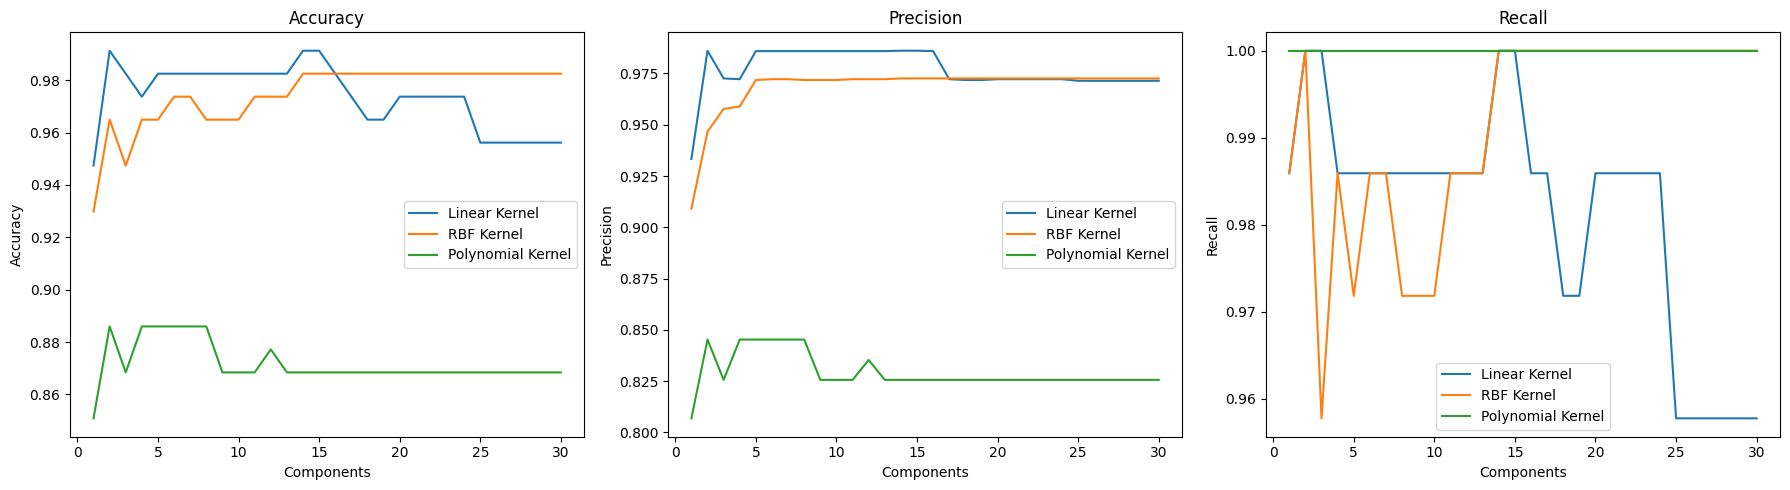


Linear Regression Results
LR Accuracy: 0.9737
LR Precision: 0.9722
LR Recall: 0.9859


In [120]:
xTrainStd, xTestStd, yTrain, yTest = loadCancerData()

results, optimalComponents, maxAccuracy = findOptimalPcaComponents(xTrainStd, xTestStd, yTrain, yTest)

print("Optimal number of PCA components (K) for accuracy:")
for kernel in optimalComponents:
    print(f"{kernel.capitalize()} Kernel: K = {optimalComponents[kernel]} with Accuracy = {maxAccuracy[kernel]:.4f}")

plotResults(results)

# Logistic Regression for comparison
logRegAccuracy, logRegPrecision, logRegRecall = evaluateLogisticRegression(xTrainStd, xTestStd, yTrain, yTest)
print(f"\nLinear Regression Results")
print(f"LR Accuracy: {logRegAccuracy:.4f}")
print(f"LR Precision: {logRegPrecision:.4f}")
print(f"LR Recall: {logRegRecall:.4f}")

#Problem 2

In [121]:
housingData = loadHousingData(housingData)

X = housingData[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
                 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = housingData['price']

In [122]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

In [123]:
def findOptimalPca(xTrainScaled, xTestScaled, yTrain, yTest, kernel='linear'):
    bestR2 = -np.inf
    bestNComponents = 0
    pcaR2Scores = []
    for nComponents in range(1, xTrainScaled.shape[1] + 1):
        pca = PCA(n_components=nComponents)
        xTrainPca = pca.fit_transform(xTrainScaled)
        xTestPca = pca.transform(xTestScaled)

        # Train SVR model with the selected kernel
        svr = SVR(kernel=kernel)
        svr.fit(xTrainPca, yTrain)

        # Evaluate performance
        yPred = svr.predict(xTestPca)
        r2 = r2_score(yTest, yPred)  # Corrected function name here
        pcaR2Scores.append(r2)

        if r2 > bestR2:
            bestR2 = r2
            bestNComponents = nComponents

    return bestNComponents, pcaR2Scores

In [124]:
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    bestN, r2Scores = findOptimalPca(xTrainScaled, xTestScaled, yTrain, yTest, kernel=kernel)
    results[kernel] = (bestN, r2Scores)

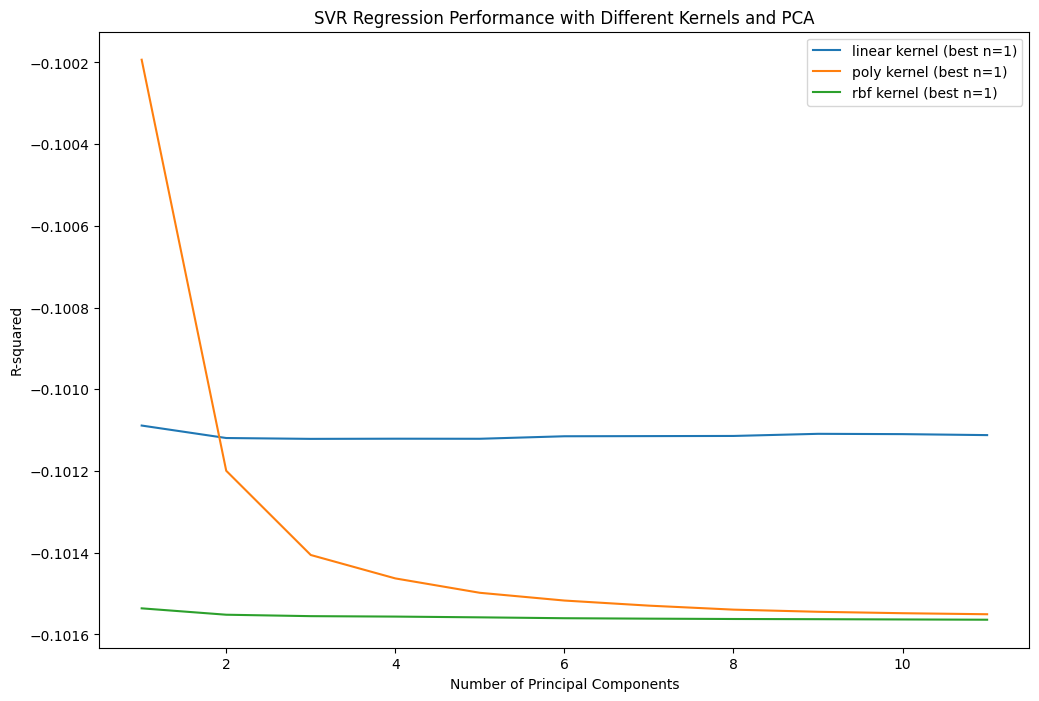

In [125]:
# Plotting the performance for different kernels
plt.figure(figsize=(12, 8))
for kernel, (bestN, r2Scores) in results.items():
    plt.plot(range(1, xTrainScaled.shape[1] + 1), r2Scores, label=f'{kernel} kernel (best n={bestN})')

plt.xlabel('Number of Principal Components')
plt.ylabel('R-squared')
plt.title('SVR Regression Performance with Different Kernels and PCA')
plt.legend()
plt.show()